In [3]:
import cv2 as cv2  
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path


In [36]:
def cutPunctuation(img,wordname_path):
    #plt.imshow(img)
    img = cv2.bitwise_not(img) 
    newX=256
    newY=256
    #plt.figure()
    #plt.imshow(img)
    #img = cv2.resize(img,(int(newX),int(newY)))
    img=img//255
    y=img.sum(axis=0)
    
    #print (y)
    #print(y.shape)
    num=np.size(img,1)
    x = np.arange(num)
    ###print(x.shape)
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show()
    plt.figure()
    
    
    #width=np.size(img,0)
    #xc=np.size(img,0)
    #print(width)
    #img = img[0:width, 0:250]
    #plt.imshow(img)
    
    #x = np.array([1,0,2,0,3,0,4,5,6,7,8])
    #print("========")
    
    index=np.where(y == 0)[0]
    #index=np.where(y <= 10)[0]
    
    #print(index)
    len=index.shape[0]
    rev_index=index[::-1]
    #print(len)
    #print("========")
    
   
    
    width=np.size(img,1)
    
    height=np.size(img,0)
    print(width)
    print(height)
    
    
    sum_ink=0
    for i in  range(0, len-1):
        #print(i,"++++")
        
        if rev_index[i+1]<rev_index[i]-1: #by pass the contigues zeros that exist
            #print("dif=",rev_index[i]-rev_index[i+1],"index=",i )
            #print(rev_index[i])
            #print(rev_index[i+1])
            
            xc=rev_index[i+1]
            
            imgF = img[0:height, 0:xc]
            
            
            imgT= img[0:height, xc:width]
            half=height/2
            print('==========')
            print('half',half)
            print('xc',xc)
            hprof=imgT.sum(axis=1)
            sumakiarea=hprof.sum()
            print('sumarea',hprof,sumakiarea)
            hprofIndex=np.where(hprof == 0)
            hprofZerosNum=np.size(hprofIndex,1)
            
            print('zeros',hprofZerosNum)
            
            print('==========')
            #if hprofZerosNum-3 >= half:
            if sumakiarea >= 95:   
                #do not cut
                
                imgF=255*imgF
                imgF=abs(255-imgF)
                imgReturn=imgF
                
                #plt.figure()
                #plt.imshow(imgF)
                return imgReturn
            else:
                #cut
                img=255*img
                img=abs(255-img)
                imgReturn=img
                return imgReturn
            
           
        
        
        
        
        

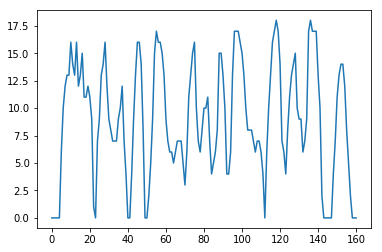

161
33
half 16.5
xc 147
sumarea [0 0 0 0 0 0 0 0 1 5 7 7 5 4 0 0 0 0 0 0 0 4 6 8 7 6 5 5 5 6 5 4 0] 90
zeros 16
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


<Figure size 432x288 with 0 Axes>

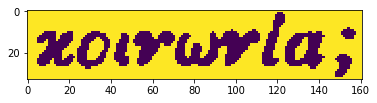

In [37]:

#print(Path('tmp').parent)


wordname_path="..\\tmp1\\111.png"
wordname_path="..\\tmp1\\12.png"

wordname_path="..\\tmp1\\2.png"
wordname_path="..\\tmp1\\1.png"
wordname_path="..\\tmp1\\11.png"
img= cv2.imread(wordname_path,0);


#img=abs(255-img)
#img=img//255
#print(img)
#plt.figure()
#plt.imshow(img)
#img = cv2.bitwise_not(img)
imgx=cutPunctuation(img,wordname_path)

#imgx=255*imgx
#imgx=abs(255-imgx)
#imx=imgx.astype(int)

plt.figure()
plt.imshow(imgx)
print(imgx)
#cv2.imwrite('tmp1/111.png',imgx)